
# <span style="color: blue;"> Predicción de estructuras moleculares con Redes Neuronales de grafos(Chemical Graph Neural Networks). Parte I</span>


## 1. Representación computacional de los átomos y moléculas




<img src="molecules3.png" width="800" class="center"> 


<table>
<tr>
    <td> <img src="smiles.png" width="300"> </td>
    <td> <img src="fingerprint.png" width="300">  </td>
</tr>
<tr>
   <td style='text-align:center'> Smiles </td>
    <td style='text-align:center'> Morgan fingerprint </td>
</tr>
</table>    






## 2. Uso de Rdkit en la obtención de propiedades moleculares

Mucha de la información nesesaria para hacer análisis de datos aplicado a la química requiere de propiedades moleculares como número de enlaces, electrones de valencia, entre otras. En esta primera parte del taller veremos como usar rdkit para leer moléculas y obtener algunas de sus propiedades moleculares.

1. ¿Que es rdkit?
2. ¿Qué puedo hacer?

### Cargando librerias

In [1]:
!pip install rdkit-pypi
!pip install pandas
!pip install seaborn

# Data Science 
# ==============================================================================
import pandas as pd
import numpy as np


# Rdkit import for molecular features
# ==============================================================================
import rdkit
from rdkit.Chem import Descriptors
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem import ChemicalFeatures




# Ploting 
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns



### Leyendo conjunto de datos y sanitizando smiles

In [2]:
df = pd.read_csv('/home/joana/Documentos/GitHub/Molecular-Autoencoder/notebooks/delaney.csv')
df

,smiles
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Cc1occc1C(=O)Nc2ccccc2
2,CC(C)=CCCC(C)=CC(=O)
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,c1ccsc1
...,...
1123,FC(F)(F)C(Cl)Br
1124,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,CCSCCSP(=S)(OC)OC
1126,CCC(C)C


In [3]:
#Función sanitizadora: 

def validate_smiles (smiles):
   
    mol = Chem.MolFromSmiles(smiles)
   
    if mol:
   
            #  GetMolFrags checks wether we have more than one molecule
            if len(rdmolops.GetMolFrags(mol)) > 1:
                return False
            try:
                #  Sanitization check valence (detects invalid values)
                rdmolops.SanitizeMol(mol)
                return True
            except ValueError:
                return False
    else:
        return False

In [4]:
df['validate smiles'] = df['smiles'].apply(validate_smiles)
df.describe()

,smiles,validate smiles
count,1128,1128
unique,1123,1
top,ClC(Cl)C(c1ccc(Cl)cc1)c2ccc(Cl)cc2,True
freq,2,1128


In [5]:
######nuevo dataframe con los smiles leídos correctamente######
data_clean = df[df['validate smiles']==True]
data_clean


,smiles,validate smiles
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,True
1,Cc1occc1C(=O)Nc2ccccc2,True
2,CC(C)=CCCC(C)=CC(=O),True
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,True
4,c1ccsc1,True
...,...,...
1123,FC(F)(F)C(Cl)Br,True
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,True
1125,CCSCCSP(=S)(OC)OC,True
1126,CCC(C)C,True


## Propiedades moleculares

In [6]:
#Leyendo y obteniendo moleculas de los smiles con rdkit

data_clean['mol'] = data_clean['smiles'].apply(rdkit.Chem.MolFromSmiles)
data_clean.head()


,smiles,validate smiles,mol
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbc60>
1,Cc1occc1C(=O)Nc2ccccc2,True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbcb0>
2,CC(C)=CCCC(C)=CC(=O),True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbad0>
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbc10>
4,c1ccsc1,True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbd50>


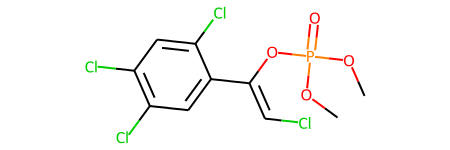

In [7]:
data_clean.loc[1127,'mol']

In [8]:
#Definiendo propiedades moleculares

def average_Molecular_Weight(mol):
    return Descriptors.MolWt(mol)

def alogp(mol):
    return Descriptors.MolLogP(mol)

def num_conformers(mol):
    return mol.GetNumConformers()

def number_Aromatic_Atoms(mol):
    return sum([1 for _ in mol.GetAromaticAtoms()])

def number_Conjugated_bonds(mol):
        return sum([1 for bond in mol.GetBonds() if (bond.GetIsConjugated() and not bond.IsInRing())])



In [9]:
data_clean['molecular weight'] = data_clean['mol'].apply(average_Molecular_Weight)
data_clean['ALogP'] = data_clean['mol'].apply(alogp)
data_clean['No aromatic atoms'] = data_clean['mol'].apply(number_Aromatic_Atoms)
data_clean['Number of Valence Electrons'] = data_clean['mol'].apply(rdkit.Chem.Descriptors.NumValenceElectrons)
data_clean['Number of Conjugated Bonds'] = data_clean['mol'].apply(number_Conjugated_bonds)
data_clean.head()

,smiles,validate smiles,mol,molecular weight,ALogP,No aromatic atoms,Number of Valence Electrons,Number of Conjugated Bonds
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbc60>,457.432,-3.10802,6,178,0
1,Cc1occc1C(=O)Nc2ccccc2,True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbcb0>,201.225,2.84032,11,76,4
2,CC(C)=CCCC(C)=CC(=O),True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbad0>,152.237,2.87800,0,62,3
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbc10>,278.354,6.29940,22,102,0
4,c1ccsc1,True,<rdkit.Chem.rdchem.Mol object at 0x7f771d7dbd50>,84.143,1.74810,5,26,0


## Visualización de propiedades moleculares

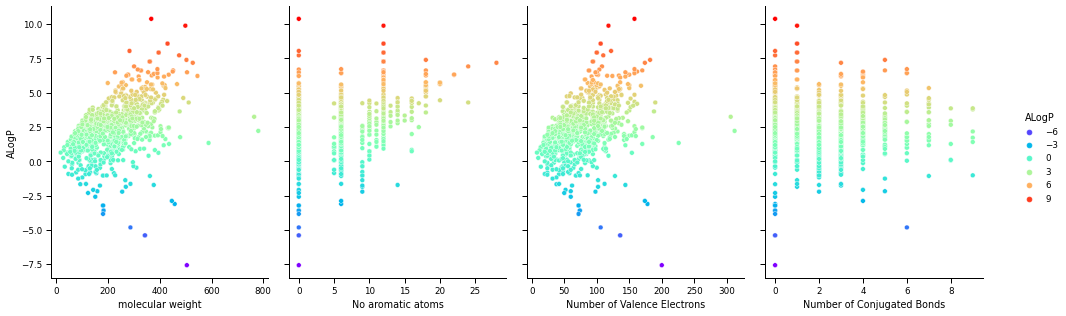

In [10]:
# Here we show the relationship that exist beetwenn our tarhet variablle and the independent variables
# ==============================================================================
sns.set_context("paper")
pairplot = sns.pairplot(data_clean,
             x_vars=['molecular weight','No aromatic atoms',
                     'Number of Valence Electrons','Number of Conjugated Bonds'],
             y_vars=['ALogP'],
             hue='ALogP',
             palette='rainbow')

pairplot.fig.set_figheight(5)
pairplot.fig.set_figwidth(15)


plt.show()

<table>
<tr>
    <td> <img src="balanza.jpg" width="150"> </td>
    <td> <img src="acetato.jpg" width="300">  </td>
    <td> <img src="valence.jpg" width="300">  </td>
    <td> <img src="benceno.png" width="150">  </td>
</tr>
<tr>
    <td>  </td>
    <td style='text-align:center'> Acetato de isoamilo </td>
    <td>   </td>
    <td>   </td> 
</tr>
</table>    

<h3 style="color:purple";> Ejercicio: Obtener el número de enlaces rotables (NumRotableBonds) y número de donantes de enlaces hidrógeno (NumHDonors). </h3>

# 2.  ¿Qué son los grafos?

Un grafo G consta de un conjunto no vació finito de V(G) de elementos llamados vértices y una familia finita E(G) de pares de elementos desordenados (no necesariamente distintos) llamados aristas.

<img src="grafosnames2.png" width="400">

<h3 style="color:purple";> Ejercicio: Indica el número de vértices, aristas y grado de cada vértice en las siguientes figuras. </h3>


<table>
<tr>
    <td> <img src="fig1.3.png" width="280"> </td>
    <td> <img src="fig1.14.png" width="200">  </td>
</tr>
<tr>
   <td style='text-align:center'> a) </td>
    <td style='text-align:center'> b) </td>
</tr>
</table>    




## Tipos de grafos

## Grafos dirigidos y no dirigidos

Las aristas tienen un sentido, normalmente representado por flechas. En los grafos no dirigidos las aristas se conectan a los vértices en ambos sentidos 
 
 <img src="directed_undirected.png" width="500">


## Grafos platónicos
Formados a partir de los vértices y aristas de cinco sólidos regulares (platónico): el tetraedro, octaedro, cubo, icosaedro y dodecaedro.

<img src="platonic_graphs.png" width="500">

<table>
<tr>
    <td> <img src="metano.png" width="150"> </td>
    <td> <img src="nacl.jpeg" width="250">  </td>
</tr>
</table>    

## Grafos etiquetados y no etiquetados
El grafo contiene información útil relativa a la arista como el nombre, peso, coste o un valor de cualquier tipo de datos dado. P. e. Tiempo que tarda un vuelo entre dos ciudades. 

En el caso contrario, las aristas no tienen información extra.


# Representación de grafos

<table>
<tr>
    <td> <img src="diagrama_matriz.png" width="250"> </td>
    <td> <img src="matrices.png" width="300">  </td>
</tr>
</table>    


<table>
  <tr>
     <td> 
<p style="color:blue";>A = Matriz de adyacencia</p>

Matriz formado por los n vértices

1 - si hay una arista entre el vértice i y j

0 en caso contrario </td>  
  
  
<td>  
<p style="color:blue";>M = Matriz de incidencia</p>


Matriz de vértices y aristas

1 - conectado

0 - no conectado    </td>  
    
  </tr>
</table>    




<h3 style="color:purple";> Ejercicio: Obtenga la matriz de adyacencia para el siguiente grafo.</h3>

<img src="ejercicio_adyacencia.png" width="300">



# Introducción a redes neuronales de grafos (GNNs)

-Concepto de nodo embebido: mapear los nodos a un espacio embebido de dimensión d (un espacio de menor dimensión que el del grafo)

-**Objetivo: mapear los nodos de tal forma que la similitud en el espacio embebido se aproxime a la similitud en la red neuronal.**

<img src="similarity-function.png" width="500"> 

<p style="color:blue";> Reto: ¿Qué forma tiene la función codificadora?</p>


**Función codificadora**

<ul>
    <li>Local (vecinos en la red local)</li>
    <li>Información agregada</li>
    <li>Apilar varias capas (computación)</li>
</ul>    

<img src="Neighborhood-exploration.png" width="500">



Agregar información -> Redes neuronales


<img src="Neural-networks-1.png" width="500">


Las redes neuronales, presentadas en gris, requieren funciones invariantes en el orden como: la suma, el promedio los máximos, entre otras.


### Referencias

1) Robin J Wilson. 1986. Introduction to graph theory. John Wiley & Sons, Inc., USA.

2) Amal Menzli. Graph Neural Network and Some of GNN Applications – Everything You Need to Know. https://neptune.ai/blog/graph-neural-network-and-some-of-gnn-applications